# 1.Toetsen van een hypothese

Bij toetsen gaan we uit van een veronderstelling en proberen na te gaan of we die kunnen bevestigen of verwerpen

* Hypothese = Veronderstelling
* We proberen de hypothese tegen te spreken
* Als we een meting doen die in de lijn ligt met de veronderstelling, hebben we niks bewezen
* Als we een meting doen die de hypothese tegen-spreekt, is er veel kans dat deze niet waar is

Standaardafwijking van de onderliggende populatie is GEKEND -> <b>X-bar is normaal verdeeld</b>

Standaardafwijking van de onderliggende populatie is NIET GEKEND
* a. steekpoefgroote >= 30 -> <b>X-bar is normaal verdeeld</b>
* b. steekpoefgroote <= 30 -> <b>X-bar is verdeeld volgens een Student-verdeling</b>


## Algemene stappenplan

  1. formuleer de **hypotheses**
  2. kies een **significantieniveau** $\alpha$
  3. doe een **steekproef** van grootte n
  4. gaat het om een **eenzijdig** of **tweezijdig** toets?
  5. stel een **aanvaardingsinterval** op: $p=1-\alpha$ of $p=1-\frac{\alpha}{2}$ m.b.v. *een* verdeling of bepaal de **P-value**
  6. trek een **besluit**

### Voorbeeld

<u>Stap 1</u>

* $H_0$: laptops verbruiken gemiddeld 31 Watt
    * H0 : $\mu = 31$
* $H_1$: laptops verbruiken gemiddeld **meer of minder** dan 31 Watt
    * H1 : $\mu \neq 31$

<u>Stap 2</u>

We kiezen $\alpha=0.05$. We hebben dus nog altijd 5% kans dat ons besluit door (stom toeval) verkeerd zal zijn. Dit moet op **voorhand** gekozen worden, en daarom dat wetenschappers meestal ook meerdere studies doen alvorens ze besluiten trekken.

<u>Stap 3</u>

We doen een steekproef van met grootte $n=30$.  In principe zouden we kunnen opteren om een normaalverdeling te gebruiken, maar omdat computertools het nu veel makkelijker maken om de Student t-verdeling te gebruiken en $n$ tegen grens van 30 ligt, gebruiken we dus hier de Student t-verdeling.

<u>Stap 4</u>
Door de formulering van de alternatieve hypothese $H_1$ weten we dat het hier gaat om een tweezijdige toets.

<u>Stap 5</u>

* bepaal eerst <mark>de grenzen $t_1$ en $t_2$</mark> van het aanvaardingsinterval op de t-verdeling.
<br>Bij tweezijdige toets zijn dit de waarden van t die horen bij <mark>$\frac{\alpha}{2}$ en $1 - \frac{\alpha}{2}$</mark>




[-2.04522964  2.04522964]


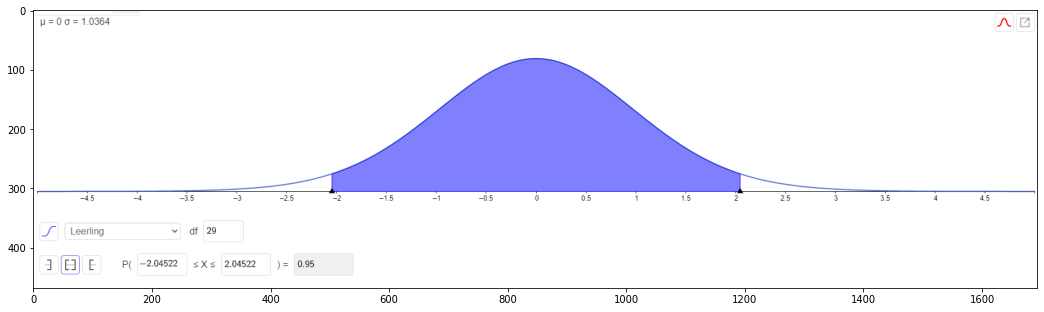

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import sm as sm
from scipy.stats import t
a = 0.05    #alpha
n = 30      #steekproef grote
s = 20      #standaardafwijking
x_bar = 40  #steekproef gemiddelde
mu0 = 31    #h0 gem.

steekproefverdeling = t(n-1) # aanmaken student verdeling
t1, t2 = steekproefverdeling.ppf(q=[a/2, 1-a/2]) # tweezijdig
ts = np.array([t1,t2])
print(ts)


plt.figure(figsize=(18,10))
img = plt.imread('student_laptops.PNG')
plt.imshow(img)


* Nu bepaal je wat de overeenkomstige x-waarden zijn van deze t-waarden. Hiervoor gebruik je de $\mu$ uit de nulhypothese $H_0$, dus in ons geval is $\mu_0 = 31$, want je gaat volgens $H_0$ uit van het feit dat de <b>steekproefgemiddeldes $\bar{x}$</b>  liggen tussen:

$$\mu_0 + t_1\cdot\frac{s}{\sqrt{n}} < \bar{x} < \mu_0 + t_2\cdot\frac{s}{\sqrt{n}}$$
*Merk op: $t_1$ is negatief*



In [37]:

# x-waarden (omzetting van t-score naar originele waarden)
grenzen = mu0 + ts*s/np.sqrt(n)
grenzen
# we bekomen voor MU0 (31 watt)
# de grenzen [23.53187726, 38.46812274]
# Onze steekproef heeft een gemiddelde van 40 en valt buiten het aanvaardigs-interval
# Dat betekend dat H0 niet waar is en we dit kunnen verwerpen

array([23.53187726, 38.46812274])

<u>Conclusie</u>: we kunnen $H_0$ <b>wel</b> verwerpen, want ons steekproefgemiddelde $\bar{x}=40$
valt **buiten** de grenzen van het aanvaardingsinterval

Stel dat $H_0$ echter stelde dat het gemiddelde verbruik 33 Watt is, $\mu_0=33$



In [38]:
mu0 = 33
grenzen = mu0 + ts*s/np.sqrt(n)
grenzen

array([25.53187726, 40.46812274])

<u>Conclusie</u>: We kunnen $H_0$ <b>niet</b> verwerpen, want ons steekproefgemiddelde $\bar{x}=40$ valt nu **binnen** de grenzen van het aanvaardingsinterval

<u>Stap 5b</u>

Berekenen de P-value.<br>
* Als de p-value <b> KLEINER</b>  is dan alpha (0.05) kan je $H_0$ verwerpen
<br>De P-value is de <b>kans</b> dat we dit uitzonderlijke resultaat vinden in onze steekproef gegeven dat $H_0$ waar is.

$$P-value = P(\mu = \bar{x} ~|~ H_0)$$

In [39]:
#steekproefverdeling is een t-verdeling
mu0 = 31
x_bar = 40
s = 20
n = 30
t = (x_bar - mu0)/(s/np.sqrt(n))
print(t)
p_value = 1 - steekproefverdeling.cdf(t)
print("p-value={:.6f} is kleiner dan α/2={} --> verwerpen".format(p_value,a/2))

2.4647515087732472
p-value=0.009938 is kleiner dan α/2=0.025 --> verwerpen


In [40]:
#steekproefverdeling is een t-verdeling
mu0 = 33
x_bar = 40
s = 20
n = 30
t = (x_bar - mu0)/(s/np.sqrt(n))
print(t)
p_value = 1 - steekproefverdeling.cdf(t)
print("p-value={:.4f} is groter dan α/2={} --> niet verwerpen".format(p_value,a/2))

1.9170289512680814
p-value=0.0326 is groter dan α/2=0.025 --> niet verwerpen


<u>Stap 6</u>

Het besluit.

We verwerpen de originele bewering dat laptops gemiddeld maar 31 Watt verbruiken ($H_0: \mu=31$). De kans dat we dit foutief verwerpen (een Type I-fout) bedraagt 5% (het significantieniveau $\alpha$).

## De kaasknoeiers

In opdracht van een kaasfabriek onderzoeken we of sommige leveranciers knoeien met hun melk door er water toe te voegen. We nemen **5 opeenvolgende zendingen** melk en kijken op welke temperatuur deze bevriest. We weten dat het vriespunt van melk gelijk is aan -0,545°C met een standaardafwijking van 0,008°C. Het vriespunt van water is natuurlijk 0°C.

In onze steekproef vinden we een gemiddeld vriespunt van -0,539 °C. Stel $\alpha$ = 0,1

1.formuleer de hypotheses
* $H_0: \mu=-0,545$ (alles is inorde "het normale geval")
* $H_1 : \mu > \mu_0$ (we beweren dat het vriespunt hoger ligt)


2.kies een significantieniveau :<br>
α alpha = 0.1 = 10% = <mark><b>de kans dat we toch nog mis zijn bij het
verwerpen of aanvraarden van de hypotese dit dan door toeval</b></mark>

3. doe een steekproef van grootte n

Check, we hebben een steekproef gedaan met grootte $n=5$

4. gaat het om een eenzijdig of tweezijdig toets? Het gaat om een eenzijdige toets <b><mark>we zeggen dat het MEER is ></b></mark>


De formulering van de hypothese maken dat het hier gaat om een **eenzijdige** toets, want als er geknoeid is dan moet de temperatuur van het mengsel stijgen door de toevoeging van water (met vriespunt 0°C)

5. stel een **aanvaardingsinterval** op: $p=1-\alpha$ of $p=1-\frac{\alpha}{2}$ m.b.v. *een* verdeling of bepaal de **P-value**

### Eigenschappen
* n = steekproef aantal
* σ = standaard afwijking
* μ = algemeen gemiddelde
* α = tolerantie van het toeval
* se = standaard error σ / np.sqrt(n)
* x_bar = gemiddelde dat uit de steekproef komt

Maak een normaalverdeling of studentverdeling = < 30 ?
Factor bereken waar de grens ligt

1.2815515655446004
0.9000000000000002
-0.5404149817324336


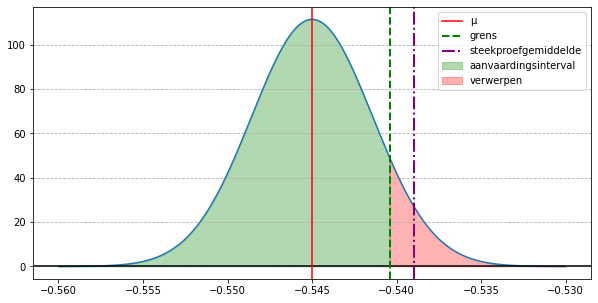

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, stats

n = 5
σ = 0.008
μ = -0.545
α = 0.1
se = σ / np.sqrt(n)
x_bar = -0.539

# normaalverdeling
steekproefverdeling = norm(loc=μ, scale=se)

# factor alpha bereken waar de grens ligt
fa = norm.ppf(1-α)
print(fa)

# eenzijdig = mu + fa * σ / np.sqrt(n)
grens = μ + fa * se
print(steekproefverdeling.cdf(grens))
print(grens)

fig, ax = plt.subplots(1,1, figsize=(10,5))
x = np.linspace(-0.56,-0.53,500)
x1 = np.linspace(-0.56, grens, 500)
x2 = np.linspace(grens, -0.53, 500)
y = steekproefverdeling.pdf(x)
ax.plot(x,y)
ax.fill_between(x1, steekproefverdeling.pdf(x1), color='green', alpha=0.3, label='aanvaardingsinterval')
ax.fill_between(x2, steekproefverdeling.pdf(x2), color='red', alpha=0.3, label='verwerpen')
ax.axhline(y=0, color='black')
ax.axvline(x=μ, color='red', label='μ')
ax.axvline(x=grens, color='green', label='grens', linewidth=2, linestyle='--')
ax.axvline(x=x_bar, color='purple', linewidth='2', linestyle='-.', label='steekproefgemiddelde')
ax.grid(linestyle='--', axis='y')
_ = ax.legend()

In [42]:
z = (x_bar -  μ)/se
print(z)
p_value = 1 - norm.cdf(x=z)
p_value

1.677050983124844


0.04676625634454634

## Oplossing met Student-verdeling (t)

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
a = 0.1    #alpha
n = 5      #steekproef grote
s = 0.008      #standaardafwijking
x_bar = -0.539  #steekproef gemiddelde
mu0 = -0.545    #h0 gem.

steekproefverdeling = t(n-1) # aanmaken student verdeling
t1, t2 = steekproefverdeling.ppf(q=[a/2, 1-a/2]) # tweezijdig
ts = np.array([t1,t2])
print(ts)



# x-waarden (omzetting van t-score naar originele waarden)
grenzen = mu0 + ts*s/np.sqrt(n)
grenzen

[-2.13184678  2.13184678]


array([-0.55262713, -0.53737287])

In [63]:
#steekproefverdeling is een t-verdeling
a= 0.1
mu0 = -0.545
x_bar = -0.539
s = 0.008
n = 5
t = (x_bar - mu0)/(s/np.sqrt(n))
print(t)
p_value = 1 - steekproefverdeling.cdf(t)
print("p-value={:.6f}  alpha ={:.6f}".format(p_value,a))

1.677050983124844
p-value=0.084419  alpha =0.100000


In [64]:
x_bar = -0.539

from scipy.stats import ttest_1samp
t,p_value = ttest_1samp()

SyntaxError: invalid syntax (<ipython-input-64-631266441718>, line 3)